# Finding the best markets to advertise in

An e-learning company that offers courses on programming, such as web and mobile development, wants to advertise their product. This project aims to find out the two best markets to promote their product.

This work is based on the [data]( https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969) from freeCodeCamp's 2017 New Coder Survey. freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a [popular Medium publication]( https://medium.freecodecamp.org/) (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our study.The survey data is publicly available in [this](https://github.com/freeCodeCamp/2017-new-coder-survey) GitHub repository.

## Data overview

In [1]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data
survey = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv", low_memory=False)

In [3]:
# Number of rows and columns
survey.shape

(18175, 136)

In [4]:
survey.sample(10)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
3010,45.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
12253,21.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7012,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0
17002,44.0,0.0,NaN,NaN,NaN,NaN,1.0,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0
4759,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
556,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4788,23.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN
3389,17.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11417,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17774,31.0,0.0,NaN,NaN,NaN,NaN,2.0,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Sample representativity 

Before analyzing the sample data we have, we will check whether it's representative of our population of interest and if it has the right categories of people for our purpose. The column `JobRoleInterest` describes for every participant the role(s) they'd be interested in working. If a participant is interested in working in a certain domain, it is likely that they're also interested in learning about that domain. We will drop all the rows where participants didn't answer what role they are interested in. Where a participant didn't respond, we can't know for sure what their interests are.

In [5]:
survey.dropna(subset=["JobRoleInterest"], inplace=True)

survey["JobRoleInterest"].sample(15, random_state=0)

12798      Front-End Web Developer, Data Engineer, Game...
3204                              Full-Stack Web Developer
368                               Full-Stack Web Developer
15151                                     Mobile Developer
12060                                      BA or developer
1232       Front-End Web Developer,   Data Scientist, B...
15457            DevOps / SysAdmin, Back-End Web Developer
1211                                        Data Scientist
5495                                        Game Developer
12274    Information Security,   User Experience Design...
9042                              Full-Stack Web Developer
15771                               Back-End Web Developer
3817                                Back-End Web Developer
1860       User Experience Designer,   Front-End Web De...
16734    Data Engineer, Information Security,   DevOps ...
Name: JobRoleInterest, dtype: object

Several participants selected several roles. We will extract the unique values and see which roles are more popular. We will also look at the number of roles each person choose.

In [6]:
job_roles = survey["JobRoleInterest"].str.split(", ").dropna().apply(lambda x: [i.strip() for i in x])

job_roles_counts = pd.Series([j for i in job_roles for j in i]).value_counts(normalize=True) * 100
job_roles_counts.head(10)

Full-Stack Web Developer    18.575221
Front-End Web Developer     15.632743
Back-End Web Developer      12.265487
Mobile Developer            10.194690
Data Scientist               7.269912
Game Developer               7.203540
User Experience Designer     6.500000
Information Security         5.867257
Data Engineer                5.522124
DevOps / SysAdmin            4.101770
dtype: float64

In [7]:
job_roles.apply(len).value_counts(normalize=True).head(10).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
Name: JobRoleInterest, dtype: float64

The majority of the participants does not have a clear idea about the programming niche in which they would like to work. This is not a problem since the e-learning company offers several different programming courses.

Regarding the selected roles, we can conclude that almost half is in web development (full-stack, front end and back end), and around 10% is in mobile development. This is good since the e-learning company focus on web and mobile development. Let’s now see how many people are interested in at least one of these two subjects.

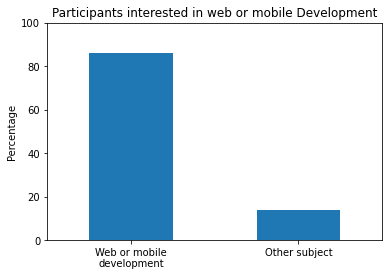

In [8]:
# Roles in web and mobile development
core_roles = {"Full-Stack Web Developer","Front-End Web Developer","Back-End Web Developer","Mobile Developer"}

# Frequency table
freq_table = job_roles.apply(lambda x: 1 if len(set(x) & core_roles) > 0 else 0).value_counts(normalize=True) * 100

# Plot results
freq_table.plot.bar()
plt.title('Participants interested in web or mobile Development')
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'], rotation = 0)
plt.ylabel('Percentage')
plt.ylim([0,100])
plt.show()

Around 86% of the participants are interested in either web or mobile development. We can conclude that the sample data used is representative of our population of interest.

## Locations and densities of new coders

We will now look at where these new coders are located, and what are the densities for each location. The column `CountryLive` describes in which country each participant lives. We can think of each country as an individual market and frame our goal as finding the two best countries in which to advertise.

In [9]:
pd.DataFrame(data = {'Count': survey["CountryLive"].value_counts(), 
                     'Percentage': survey["CountryLive"].value_counts(normalize=True) * 100}
            )

,Count,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
...,...,...
Gibraltar,1,0.014624
Aruba,1,0.014624
Botswana,1,0.014624
Cameroon,1,0.014624


45.7% of our potential customers live in the US, followed by 7.7% in India. We need to evaluate how much much money people are willing to spend on learning to check if we should recommend these two markets. Advertising in markets where most people are only willing to learn for free is not desirable. 

## Amount of money spent on learning

The columns `MoneyForLearning` has the amount of money spent (in American dollars) by participants from the moment they started coding until the moment they completed the survey. The e-learning company sells subscriptions at $59 per month. Hence, we're interested in finding out how much money each student spends per month. The column` MonthsProgramming` contains for how many months each participant has been learning.

In [10]:
money_spent = survey[["CountryLive","MoneyForLearning","MonthsProgramming", "AttendedBootcamp"]].copy()
money_spent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6992 entries, 1 to 18174
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CountryLive        6838 non-null   object 
 1   MoneyForLearning   6476 non-null   float64
 2   MonthsProgramming  6633 non-null   float64
 3   AttendedBootcamp   6894 non-null   float64
dtypes: float64(3), object(1)
memory usage: 273.1+ KB


In [11]:
# Remove all rows with null values
n_rows = money_spent.shape[0]
money_spent.dropna(inplace=True)

print("N. of rows removed: " + str(n_rows - money_spent.shape[0]))

N. of rows removed: 808


In [12]:
# Count the number of zero values
print("N. of zero values: " + str((money_spent["MonthsProgramming"] == 0).sum()))

N. of zero values: 219


Some participants answered that they had been learning to code for 0 months (it might be that they had just started when they completed the survey). To avoid dividing by 0, replace all the values of 0 with 1.

In [13]:
money_spent["MonthsProgramming"].replace(0, 1, inplace=True)

We will narrow down our analysis to only four countries: the US, India, the United Kingdom and Canada. Two reasons for this decision are:
* These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.
* Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.

In [14]:
countries = ["United States of America","India","United Kingdom","Canada"]

money_spent = money_spent[money_spent["CountryLive"].isin(countries)].copy()

In [15]:
# Calculate the money spent monthly
money_spent["money_per_month"] = money_spent["MoneyForLearning"] / money_spent["MonthsProgramming"]

Text(0.5, 0, 'Money spent monthly (American dollars)')

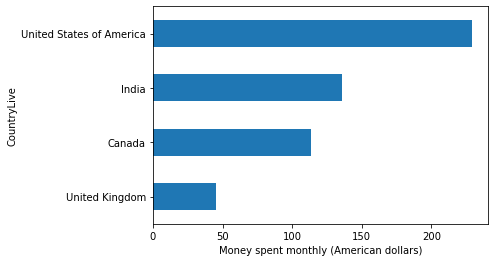

In [16]:
avg_money_spent = money_spent.groupby("CountryLive")["money_per_month"].mean()
avg_money_spent.sort_values().plot.barh()
plt.xlabel("Money spent monthly (American dollars)")

The result for the United Kingdom is surprisingly low relative to the values we see for India. We will analyze the amount spent monthly in more detail.

<AxesSubplot:title={'center':'money_per_month'}, xlabel='[CountryLive]'>

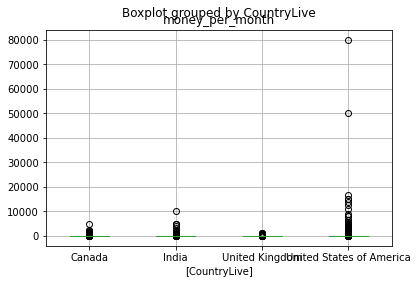

In [17]:
money_spent[["CountryLive","money_per_month"]].boxplot(by="CountryLive")

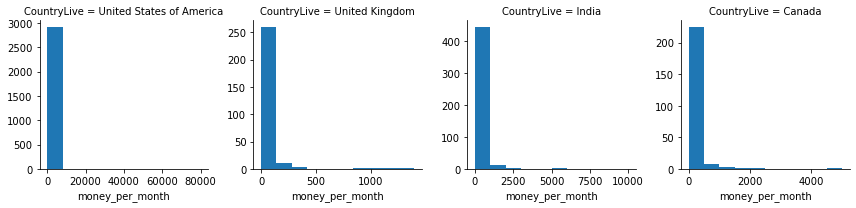

In [18]:
g = sns.FacetGrid(money_spent, col="CountryLive", sharex=False, sharey=False)
g = g.map(plt.hist, "money_per_month")

Two participants from the USA spent \\$50000 or more per month. These values are skewing the results and, since they are not very relevant for our study, they will be removed. Let’s analyze in more detail the participants that spent more than \\$2500/month.

In [19]:
money_spent = money_spent[money_spent["money_per_month"] < 50000]

money_spent_high = money_spent[money_spent["money_per_month"] > 2500]

print("N. of participants that spent more than $2500/month:" + str(money_spent_high.shape[0]))

N. of participants that spent more than $2500/month:49


49 participants spent more than \\$2500 monthly. Maybe these persons attended several bootcamps, which tend to be expensive. Or perhaps they did not understand the question regarding the money spent. The question of the survey was “Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?”. They might have misunderstood and thought university tuition is included. We will remove the participants that spent more than \\$2500 monthly and did not attend any bootcamp.

In [20]:
remove = (money_spent["money_per_month"] > 2500) & (money_spent["AttendedBootcamp"] == False)

money_spent = money_spent[~remove]

print("N. of participants removed:" + str(remove.sum()))

N. of participants removed:23


Let’s look at the remaining 26 participants that spent more than \\$2500 monthly.

In [21]:
money_spent[money_spent["money_per_month"] > 2500].sort_values("money_per_month", ascending=False).head(10)

,CountryLive,MoneyForLearning,MonthsProgramming,AttendedBootcamp,money_per_month
6805,United States of America,15000.0,1.0,1.0,15000.000000
3184,United States of America,9000.0,1.0,1.0,9000.000000
9778,United States of America,8000.0,1.0,1.0,8000.000000
718,United States of America,8000.0,1.0,1.0,8000.000000
7505,United States of America,20000.0,3.0,1.0,6666.666667
1222,United States of America,13000.0,2.0,1.0,6500.000000
3145,United States of America,17000.0,3.0,1.0,5666.666667
13145,United States of America,16000.0,3.0,1.0,5333.333333
8202,United States of America,15000.0,3.0,1.0,5000.000000
16211,United States of America,10000.0,2.0,1.0,5000.000000


Several of these participants spent $5000 or more and have been programming for 3 months or less. They most likely paid a large sum of money for a bootcamp lasting for several months. Hence, the calculated money spent monthly is not realistic and these participants will be removed.

In [22]:
remove = (money_spent["money_per_month"] >= 5000) & (money_spent["MonthsProgramming"] <= 3)

money_spent = money_spent[~remove]

print("N. of participants removed:" + str(remove.sum()))

N. of participants removed:12


Let’s plot again the results.

<AxesSubplot:title={'center':'money_per_month'}, xlabel='[CountryLive]'>

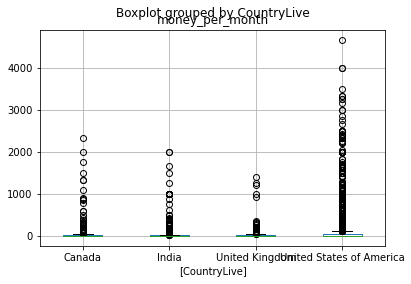

In [23]:
money_spent[["CountryLive","money_per_month"]].boxplot(by="CountryLive")

Text(0.5, 0, 'Money spent monthly (American dollars)')

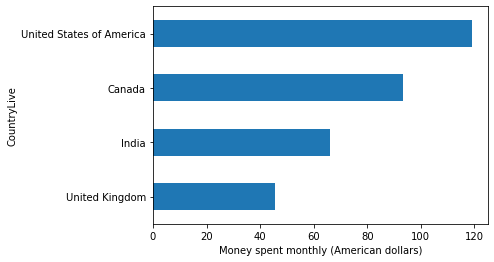

In [24]:
avg_money_spent = money_spent.groupby("CountryLive")["money_per_month"].mean()
avg_money_spent.sort_values().plot.barh()
plt.xlabel("Money spent monthly (American dollars)")

Now the results seem more plausible.

## Best markets to advertise

The e-learning company sells subscriptions at $59 per month. Let’s see how many participants in each country spent this amount or more per month.

<AxesSubplot:title={'center':'Number of potential customers '}, ylabel='CountryLive'>

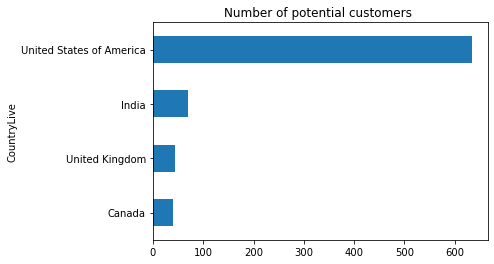

In [25]:
potential_customers = money_spent[money_spent["money_per_month"] >= 59].groupby("CountryLive").size().sort_values()
potential_customers.plot.barh(title="Number of potential customers ")

In [26]:
potential_customers["United States of America"] / potential_customers[["United States of America","India"]].sum() * 100

90.18492176386913

The two best markets are the USA and India. However, since the USA represents more than 90% of the potential customers, it does not make sense to split the advertising budget equally.

## Conclusions

We recommend that the e-learning company advertises in the USA and India. Note that, the USA represents more than 90% of the potential customers, and so, it might more sense to split the advertising budget unequally.